In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.basic_functions import mag_vector, numbers_times_vectors
from classes.ns import NeutronStar
from classes.particles import Particles

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
M_NS, R_NS = 1, 10
NS = NeutronStar(M_NS, R_NS)

xmin, xmax, zmin, zmax, npoints = -100, 100, -100, 100, 30
xrange, zrange = np.linspace(xmin, xmax, npoints), np.linspace(zmin, zmax, npoints)

mesh = np.array(np.meshgrid(xrange, zrange))
positions2d = mesh.T.reshape(-1, 2)
positions3d = np.array([np.concatenate((np.array([position[0]]), np.array([0]), np.array([position[1]]))) for position in positions2d])

Bfields3d = NS.magnetic_field(positions3d)
Bfields2d = np.array([[Bfield[0], Bfield[2]] for Bfield in Bfields3d])
Bdirecs = numbers_times_vectors(1/mag_vector(Bfields2d), Bfields2d)

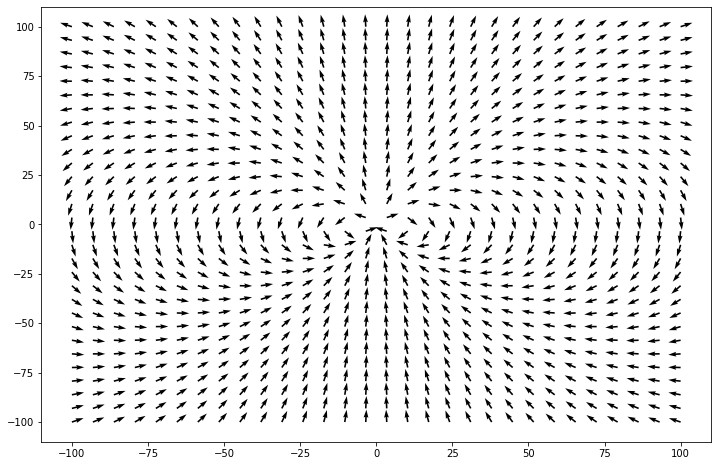

In [3]:
X, Y = positions2d.T
U, V = Bdirecs.T
q = plt.quiver(X, Y, U, V)

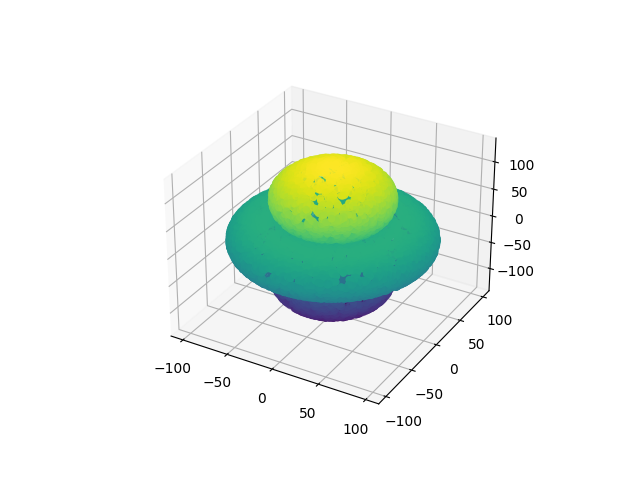

In [4]:
%matplotlib widget
X, Y, Z = NS.conversion_surface_est(Particles.axionmass).T
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, c = Z);

In [5]:
NS.conversion_radius_max(Particles.axionmass)

124.9246440178575

In [6]:
np.max(mag_vector(NS.conversion_surface_est(Particles.axionmass)))

124.92194786180335

In [7]:
position = [0, 0, 200]
NS.conversion_radius_est(position, Particles.axionmass)

124.9246440178575

In [8]:
velocity = [0,0, -1e5]
NS.conversion_radius_exact(position, velocity, Particles.axionmass)

120.60784966672837